# Loading dependency package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import allantools
from allantools import noise
import math
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.dpi'] = 120
# %matplotlib inline

# designing  color noise operation with power-law property

In [2]:
def flicker_pm(num_points):
    """ Flicker PM noise with f^1 PSD """
    return np.diff(noise.pink(num_points))

def flicker_walk_fm(num_points=1024, fs=1.0):
    """ Flicker walk FM noise with 1/f^3 PSD """
    return (1.0/float(fs))*np.cumsum(noise.pink(num_points))

def random_run_fm(num_points=1024, b2=1.0, fs=1.0):
    """ random run FM (diffusion) noise with 1/f^4 PSD
        (not really a color... rather Brownian or random-walk)

        N = number of samples
        b2 = desired PSD is b2*f^-2
        fs = sampling frequency

        we integrate brown-noise to get random run FM noise.

    """
    return (1.0/float(fs))*np.cumsum(noise.brown(num_points, b2*(4.0*math.pi*math.pi), fs=fs))

# desiging several types of data as x(t)

## type1:normal track

In [3]:
def normal_sample(N, mode='gaussian', plot_set=False):
    output = np.zeros((N))
    Am = random.uniform(100.0, 1000.0)
    cTE = random.uniform(-300.0, 300.0)
    if mode == 'gaussian':
        output = Am * np.random.randn((N)) + cTE
    elif mode == 'flicker_pm':
        output = Am * flicker_pm(N)*0.2 + cTE
    else:
        pass

    if plot_set == True:
        plt.plot(output)
        plt.ylabel('x(t)')
        plt.title(mode)
        plt.grid()
        plt.show()
    return output

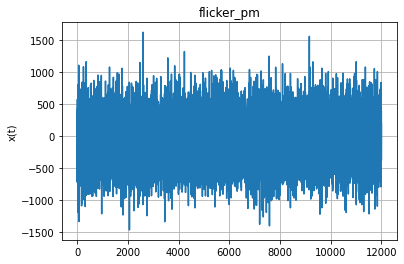

In [4]:
output = normal_sample(12000, mode='flicker_pm', plot_set=True)

## type2:holdover

In [5]:
def holdover_sample(N, mode='curve', plot_set=False):
    output = np.zeros((N))
    t = np.linspace(0, N-1, N)
    a = random.uniform(-1.0, 1.0)
    b = random.uniform(-1.0, 1.0)
    cTE = random.uniform(-300.0, 300.0)
    if mode == 'curve':
        output = 0.5/N*a*t**2 + 1/N*b*t + cTE
    elif mode == 'flicker_walk_fm':  # holdover
        output = flicker_walk_fm(N)/N *1e2
    elif mode == 'random_run_fm':  # holdover
        output = random_run_fm(N)/N
    else:
        pass

    if plot_set == True:
        plt.plot(output)
        plt.ylabel('x(t)')
        plt.title(mode)
        plt.grid()
        plt.show()
    return output

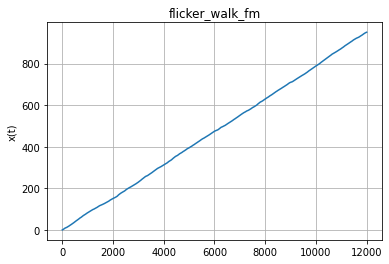

In [6]:
output = holdover_sample(12000, mode='flicker_walk_fm', plot_set=True)

## type3:phase jump

In [7]:
# jump
def jump_sample(N, plot_set=False):
    jump_num = np.random.randint(50, 200)
    jump_inx = np.random.randint(1, N, size=jump_num)
    output = np.random.randn(N)
    for k in range(jump_num):
        output[jump_inx[k]] = 2 * np.random.randint(-8, 8)
    Am = np.random.uniform(-200, 200)
    cTE = np.random.uniform(-300, 300)
    output = output*Am + cTE
    if plot_set == True:
        plt.plot(output)
        plt.ylabel('x(t)')
        plt.title('jump')
        plt.grid()
        plt.show()    
    return output

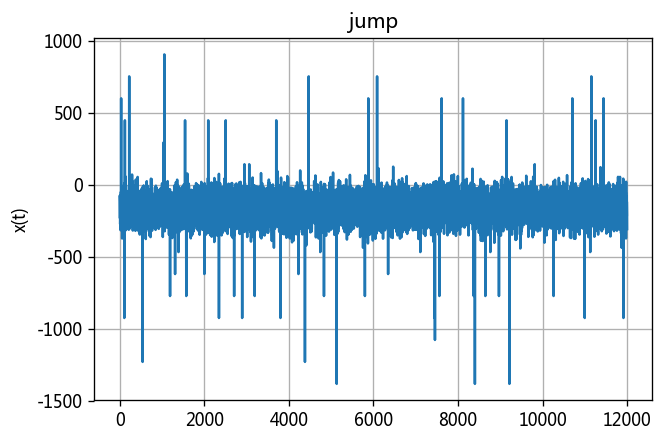

In [33]:
output = jump_sample(12000, plot_set=True)

## type4:phase transient

In [8]:
def tie_gen(N1, N2, N3):
    mu = N1
    sigma = N2
    num = N3
    rand_data = np.random.normal(mu, sigma, num)
    return rand_data

def discontinue_sample(N=12000,mode = 'mode-1',plot_set = False):
    
    if mode == 'mode-1':
        N1 = np.random.randint(1,100)
        N2 = np.random.randint(1,10)
        N3 = np.random.randint(1,int(N*0.8))
        rand_data1 = tie_gen(N1, N2, N3)
        N4 = np.random.randint(1,50)
        N5 = np.random.randint(1,5)
        N6 = N - N3
        rand_data2 = tie_gen(N4, N5, N6)
        discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size)
        discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
        #discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(8,16)
        discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size]
    elif mode == 'mode-2':
        N1 = np.random.randint(1,100)
        N2 = np.random.randint(1,10)
        N3 = np.random.randint(1,int(N*0.5))
        rand_data1 = tie_gen(N1, N2, N3)
        N4 = np.random.randint(1,30)
        N5 = np.random.randint(1,5)
        N6 = np.random.randint(1,int(N*0.3)) 
        rand_data2 = tie_gen(N4, N5, N6)
        N7 = np.random.randint(1,200)
        N8 = np.random.randint(1,4)
        N9 = N - N3 - N6
        rand_data3 = tie_gen(N7, N8, N9) 
        discontinue_gen = np.random.randn(rand_data1.size+rand_data2.size+rand_data3.size)
        discontinue_gen[1:rand_data1.size] = rand_data1[1:rand_data1.size]
        discontinue_gen[rand_data1.size+1:rand_data1.size+rand_data2.size] = rand_data2[1:rand_data2.size] + np.random.randint(10,17)
        discontinue_gen[rand_data1.size+rand_data2.size+1:rand_data1.size+rand_data2.size+rand_data3.size]= rand_data3[1:rand_data3.size]
    else:
        pass
    if plot_set == True:
        plt.plot(discontinue_gen)
        plt.ylabel('x(t)')
        plt.title('discontinue')
        plt.grid()
        plt.show()         
    return discontinue_gen

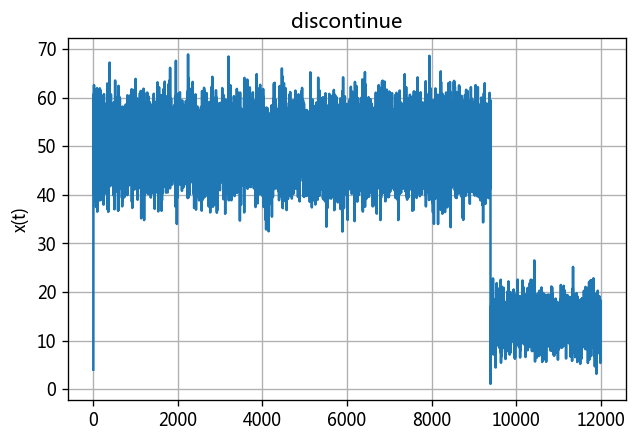

In [29]:
output = discontinue_sample(N = 12000,mode = 'mode-1',plot_set= True)

## sype5:sin-like fluctuation

In [9]:
def sin_sample(N=12000, plot_set=False):
    t = np.linspace(0, N-1, N)
    A1 = np.random.uniform(-500, 500)
    cTE1 = np.random.uniform(-200, 200)
    y1 = np.sin(np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A1 + cTE1
    A2 = np.random.uniform(-500, 500)
    cTE2 = np.random.uniform(-200, 200)
    y2 = np.sin(2*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A2 + cTE2
    A3 = np.random.uniform(-500, 500)
    cTE3 = np.random.uniform(-200, 200)
    y3 = np.sin(4*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A3 + cTE3
    A4 = np.random.uniform(-500, 500)
    cTE4 = np.random.uniform(-200, 200)
    y4 = np.sin(8*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A4 + cTE4
    A5 = np.random.uniform(-500, 500)
    cTE5 = np.random.uniform(-200, 200)
    y5 = np.sin(16*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A5 + cTE5
    A6 = np.random.uniform(-500, 500)
    cTE6 = np.random.uniform(-200, 200)
    y6 = np.sin(32*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A6 + cTE6
    A7 = np.random.uniform(-500, 500)
    cTE7 = np.random.uniform(-200, 200)
    y7 = np.sin(64*np.pi*t/N + np.pi*np.random.uniform(-1, 1))*A7 + cTE7
    y = y1 + y2 + y3 + y4 + y5 + y6 + y7
    if plot_set == True:
        plt.plot(y)
        plt.ylabel('x(t)')
        plt.title('sin-like')
        plt.grid()
        plt.show()
    return y

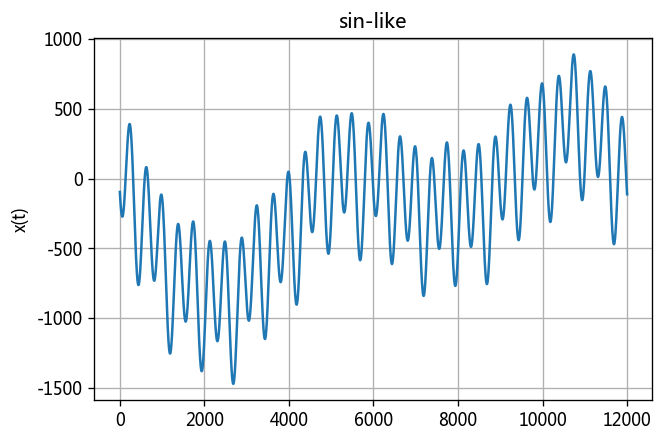

In [30]:
y = sin_sample(N = 12000, plot_set= True)

# designing up-sampling operation

In [10]:
def up_sample(y, ratio=50, mode='linear'):
    import numpy as np
    from scipy.interpolate import interp1d
    N = len(y)
    # 创建待插值的数据
    x = np.linspace(0, 12000-1, N)
    # employing linear or quadratic
    if mode == 'linear':
        fl = interp1d(x, y, kind='linear')
    else:
        fl = interp1d(x, y, kind='quadratic')

    # set min max boundary to avoid out of bounding
    xint = np.linspace(x.min(), x.max(), N*ratio)
    return xint, fl(xint)

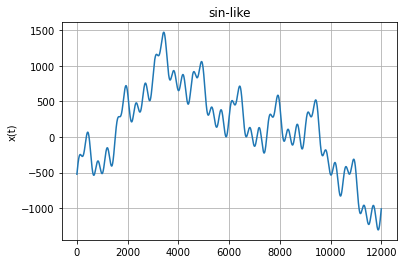

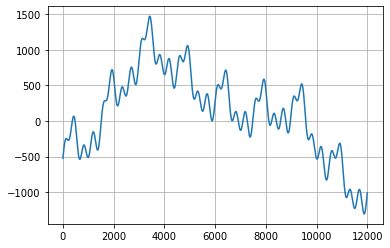

600000

In [11]:
output = sin_sample(N = 12000, plot_set= True)
x,y = up_sample(output,ratio = 50)
plt.plot(x,y)
plt.grid()
plt.show()
len(y)

# Metrics of x(t)

## TDEV and MTIE

In [12]:
def TDEV_MTIE_show(t, tie, do_mite=False):
    deltaT = t[1] - t[0]
    sample_rate = 1/deltaT
    min_tau = np.log(1/sample_rate)
    N_tdev = 32  # TDEV采样点
    tau = np.logspace(min_tau, 3, N_tdev)  # min_tau->1000
    (t, ad, ade, adn) = allantools.tdev(tie, rate=sample_rate,
                                        data_type="phase", taus=tau)  # Compute TDEV metrics
    plt.loglog(t, ad,)  # Plot the results
    plt.xlabel('tau(s)')
    plt.ylabel('TDEV(ns)')
    plt.grid()
    plt.title('metrics:TDEV')
    plt.show()
    if do_mite == True:
        (t, ad, ade, adn) = allantools.mtie_phase_fast(tie, rate=sample_rate,
                                                       data_type="phase", taus=tau)  # Compute TDEV metrics
        plt.loglog(t, ad,)  # Plot the results
        plt.xlabel('tau(s)')
        plt.ylabel('MTIE(ns)')
        plt.grid()
        plt.title('metrics:MTIE')
        plt.show()

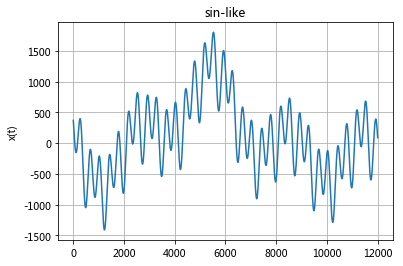

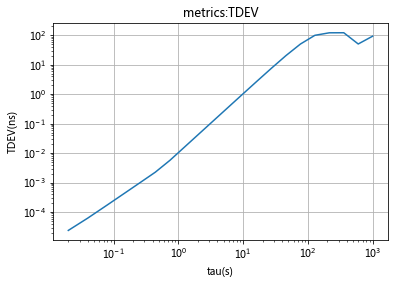

In [20]:
N = 12000
t = np.linspace(0, N-1, N)
tie = sin_sample(N=N, plot_set=True)
t, tie = up_sample(output, ratio=50)
TDEV_MTIE_show(t, tie)

## PWD and phase

In [13]:
# from scipy.fftpack import fft, fftshift, ifft as sci_fft, sci_ifft
def get_phase(tie, N):
    from scipy.fftpack import fft, ifft
    import cmath
    Y = fft(tie, N)
    phase_fun = np.zeros((N))
    for k in range(N):
        phase_fun[k] = cmath.phase(Y[k])
    return phase_fun/np.pi

def PWD_phase(tie, N):
    from scipy.fftpack import fft, ifft
    from scipy.fftpack import fftfreq
    import cmath
    num_fft = N
    YY = fft(tie, num_fft)
    Y = np.abs(YY)
    # power spectrum
    ps = Y**2 / num_fft

    # print('Y:',Y)
    # print('num_fft:',num_fft)

    Pxx_den = ps
    plt.plot(20*np.log10(Y[:num_fft//2]), label='original_power_spectrum')
    plt.legend(framealpha=0.5)
    plt.grid()
    plt.show()

    phase_fun = get_phase(tie,N)
    plt.plot(phase_fun, label='phase(f)')
    plt.legend(framealpha=0.5)
    plt.grid()
    plt.show()  

# pipeline

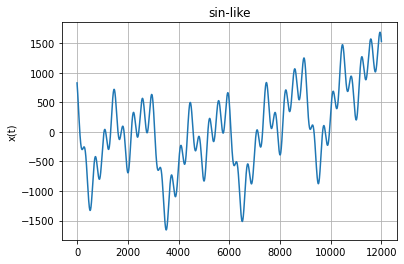

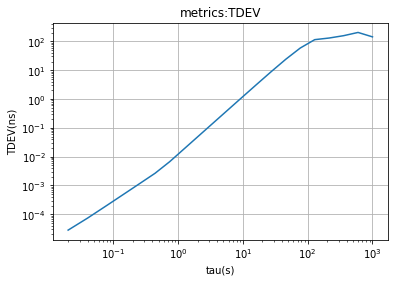

In [14]:
N = 12000
t = np.linspace(0, N-1, N)

#tie = normal_sample(N, mode='flicker_pm', plot_set=True)
#tie = holdover_sample(N, mode='flicker_walk_fm', plot_set=True)
#tie = jump_sample(N, plot_set=True)
#tie = discontinue_sample(N, mode='mode-1', plot_set=True)
tie = 100*sin_sample(N, plot_set=True)

t, tie = up_sample(output, ratio=50)
TDEV_MTIE_show(t, tie)
# PWD_phase(tie, 256)

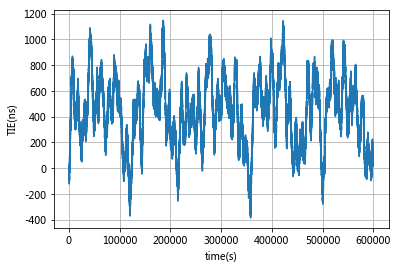

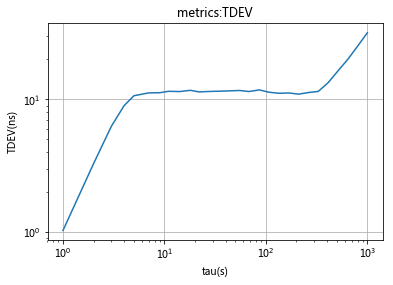

In [23]:
tmp = pd.read_csv('original_data/50Hz-loop-syncE.csv', header=None)
TIE = np.array(tmp[0])
tie = TIE[0:12000*50-1]
N = len(tie)
t = np.linspace(0, 12000*50-1, N)
plt.plot(t, tie)
plt.grid()
plt.xlabel('time(s)')
plt.ylabel('TIE(ns)')
deltaT = t[2] - t[1]
sample_rate = 1/deltaT  # 时域采样率
plt.show()
TDEV_MTIE_show(t, tie)
# PWD_phase(tie, 1024)

# saving whole dataset